<div style="text-align: center;" >
<h1 style="margin-top: 0.2em; margin-bottom: 0.1em;">Assignment 4</h1>
<h4 style="margin-top: 0.7em; margin-bottom: 0.3em; font-style:italic">Commit your solutions to GitHub until July 23, 23:59</h4>
</div>
<br>

## Part 1
## Social Network Analysis of Swiss Politicians on Twitter Data
In the first part of this assignment you will do the following tasks:
1. Build social network of retweets
2. Calculate assortativity
3. Permutation tests
4. Community detection

### Install requirements. 

The following cell contains all the necessary dependencies needed for this task. If you run the cell everything will be installed.  

* [`pandas`](https://pandas.pydata.org/docs/index.html) is a Python package for creating and working with tabular data. [Here](https://pandas.pydata.org/docs/reference/index.html) is the documentation of `pandas`.
* [`numpy`](https://numpy.org/) is a Python package for mathematical functions. [Here](https://numpy.org/doc/stable/reference/index.html) is the documentation of `numpy`.
* [`matplotlib`](https://matplotlib.org/) is a Python package for creating plots. [Here](https://matplotlib.org/stable/api/index.html) is the documentation of `matplotlib`.
* [`networkx`](https://networkx.org/) is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. [Here](https://networkx.org/documentation/stable/reference/index.html) is the documentation of `networkx`.

In [1]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install networkx

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### Import requirements
The cell below imports all necessary dependancies. Make sure they are installed (see cell above).

In [30]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1: Load social networks of retweets *(1 point)*

The attached `swiss_pol_retweet_network.gexf` file contains an undirected retweet network of Swiss politicians for the time between 2021-07-12 and 2022-07-12. Each node in the network is a represents a politician, and stores their Twitter user id, username, and party affiliation. An edge exists between a pair of politicians that exchanged at least one retweet with each other (regardless of the direction).

* How many nodes and edges are there in the network?
* Visualize the graph. Use [`draw_networkx`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) for this.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Graph with 334 nodes and 471 edges


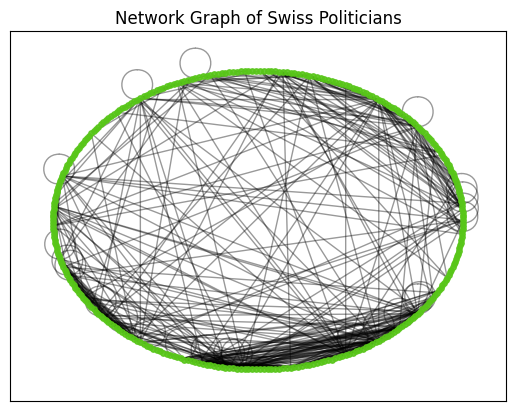

In [31]:
swiss_network = nx.read_gexf("swiss_pol_retweet_network.gexf")
print(swiss_network)
# this graph has 334 nodes and 471 edges

pos = nx.circular_layout(swiss_network)
plt.title("Network Graph of Swiss Politicians")
nx.draw_networkx(swiss_network, pos, arrows = True, node_size = 15, arrowsize = 15, with_labels=False, node_color = (0.345, 0.776, 0.098, 0.9), edge_color =(0, 0, 0, 0.4))
plt.show()

### Exercise 2: Calculate graph assortativity *(2 points)*

Use the function [`attribute_assortativity_coefficient`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.assortativity.attribute_assortativity_coefficient.html) of `networkx` to calculate the assortativity with respect to party labels. How high is the value?

In [32]:
aac = nx.attribute_assortativity_coefficient(swiss_network, 'party')
print(f'The value of the attribute assortivity coefficient with respect to party labels is {round(aac, 3)}.')

The value of the attribute assortivity coefficient with respect to party labels is 0.532.


To see if the assortativity value fits your expectations, use the function [`draw_networkx`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) to plot the network coloring each node according to the political party label of the politician. Does the pattern of colors fit the value of assortativity?

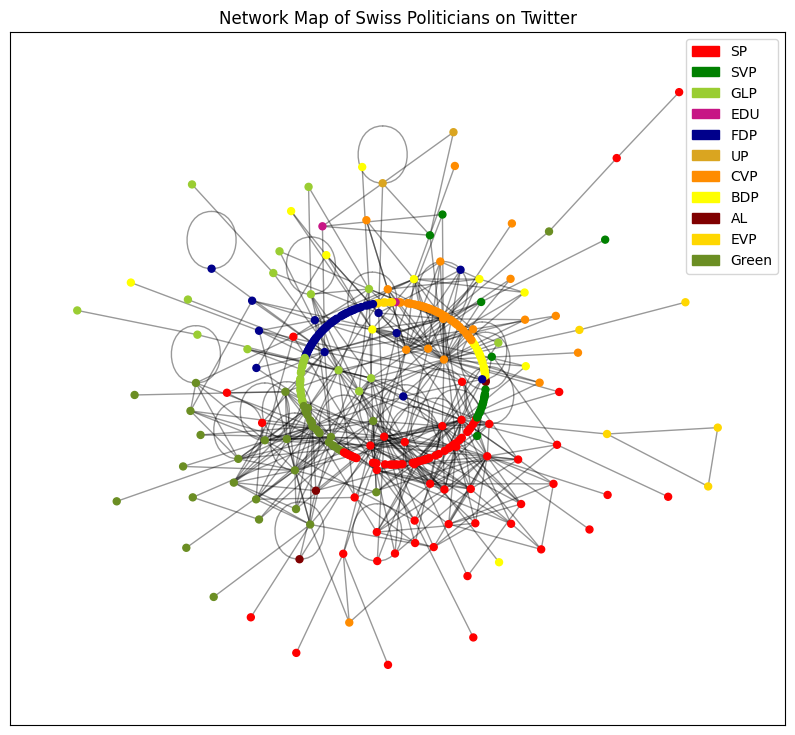

In [33]:
import matplotlib.patches as mpatches
node_attribute_values = nx.get_node_attributes(swiss_network, 'party')
# color map fooor the network graph
color_map = {party: 'maroon' if party == 'AL' 
    else 'yellow' if party == 'BDP' 
    else 'darkorange' if party == 'CVP' 
    else 'mediumvioletred' if party == 'EDU'
    else 'gold' if party == 'EVP'
    else 'darkblue' if party == 'FDP'
    else 'yellowgreen' if party == 'GLP'
    else 'olivedrab' if party == 'Green'
    else 'red' if party == 'SP'
    else 'green' if party == 'SVP'
    else 'goldenrod' if party == 'UP'
    else 'black'
    for party in set(attributes['party'] for attributes in swiss_network.nodes.values())}
node_colors = [color_map[node_attribute_values[node]] for node in swiss_network.nodes()]
plt.figure(figsize=(10,9))
pos_party = nx.kamada_kawai_layout(swiss_network)
nx.draw_networkx(swiss_network, pos_party, arrows = True, node_size = 25, arrowsize = 15, with_labels=False, node_color = node_colors, edge_color =(0, 0, 0, 0.4))
plt.title("Network Map of Swiss Politicians on Twitter")
legend_handles = [mpatches.Patch(color=color, label=value) for value, color in color_map.items()]
plt.legend(handles=legend_handles)
plt.show()

### Exercise 3: Permutation tests *(2 points)*

Next, we are going to use a permutation test to test whether the above result could have happened at random. 

First, let's run a permutation. Perform the same assortativity calculation as above but permuting the party labels of nodes. 

Also set the party for each node as node attribute by using [`set_node_attribute`](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_node_attributes.html) (be carefull the parties are now permuted).

In [34]:
# to reset it everytime the cell is run
swiss_network = nx.read_gexf("swiss_pol_retweet_network.gexf")

import random
# palindromic prime, what's not to like?
random.seed(14741)
attributes_list = list(node_attribute_values.values())
# shuffle the list of attributes to perform permutation test
random.shuffle(attributes_list)
# rezip the list of shuffled attributes and nodes
shuffled_nodes = dict(zip(list(swiss_network.nodes()), attributes_list))

nx.set_node_attributes(swiss_network, shuffled_nodes, 'party')
aac_shuf = nx.attribute_assortativity_coefficient(swiss_network, 'party')
print(f'The value of the attribute assortivity coefficient with respect to shuffled party labels is {round(aac_shuf, 3)}.')

The value of the attribute assortivity coefficient with respect to shuffled party labels is -0.001.


Is the value much closer to zero?
Repeat the calculation with 1000 permutations and plot the histogram of the resulting values. Add a line with the value of the assortativity without permutation. Is it far or close to the permuted values?

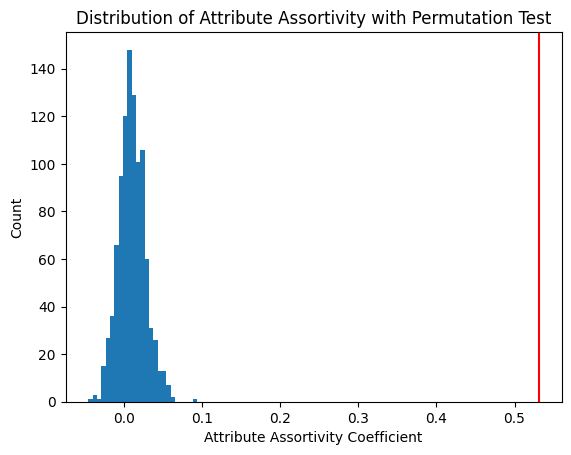

In [35]:
swiss_network = nx.read_gexf("swiss_pol_retweet_network.gexf")
permutation_list = []
for perm in range(0, 1001):
    # shuffle in place
    random.shuffle(attributes_list)
    shuffled_nodes = dict(zip(list(swiss_network.nodes()), attributes_list))
    nx.set_node_attributes(swiss_network, shuffled_nodes, 'party')
    # add each permutation to list
    permutation_list.append(nx.attribute_assortativity_coefficient(swiss_network, 'party'))
# list to numpy array for visualization
permutation_vec = np.array(permutation_list)


plt.hist(permutation_vec, label='Attribute Assortativity', bins=25)
plt.title("Distribution of Attribute Assortivity with Permutation Test")
plt.xlabel("Attribute Assortivity Coefficient")
plt.ylabel("Count")
plt.axvline(x=float(aac), linewidth=1.5, color='red')
plt.show()

To be sure, let's calculate a p-value for the null hypothesis that the assortativity is zero and the alternative hypothesis that it is positive (what we expected):

In [36]:
p_value_zero = (sum(x > 0 for x in permutation_list) + 1) / 1000
p_value_coef = (sum(x > aac for x in permutation_list) + 1) / 1000
print(f"The p-value when the null is the assortivity is 0 and the alternative is it is positive is {p_value_zero}, while it is {p_value_coef} when calculating the proportion of values at least as large as the obtained true value.")

The p-value when the null is the assortivity is 0 and the alternative is it is positive is 0.723, while it is 0.001 when calculating the proportion of values at least as large as the obtained true value.


After looking at the above results, do you think it is likely that the assortativity we found in the data was produced by chance?

Since the actual value is far above virtually all of the values in the permutation test, we can conclude that the assortivity in the data is not created by pure chance, rather the variables are dependent on each other. The p-values confirm this, with a value of 0.747 under the null that the value is 0 with the alternative being greater than 0, showing the value is very likely to be greater than 0, and a value of only 0.001, or 0.1% of the values are greater than our true value generated from the data.

### Exercise 4: Community detection *(3 points)*

Let's test if Twitter communities match political affiliations. Remove nodes with degree zero in the network and run the [Louvain community detection algorithm](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html). Visualize the result coloring nodes by community labels.

In [37]:
swiss_network = nx.read_gexf("swiss_pol_retweet_network.gexf")
# list of nodes that have degree of 0 to be removed
remove = [node for node, degree in swiss_network.degree() if degree < 1]
swiss_network.remove_nodes_from(remove)

swiss_communities = nx.community.louvain_communities(swiss_network)


# total_len = 0
# for layer in range(0, len(swiss_communities)):
#     total_len += len(swiss_communities[layer])
# total_len
# just checking how many nodes were separated into communites due to the high number of NaNs later in the groupby

Run the [`modularity`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html) function with the above community labels. Is it high enough to think that the network has a community structure?

In [38]:
nx.community.modularity(swiss_network, swiss_communities)

# Yes, a value of 0.504 shows there is most likely a community structure. A positive value indicates that there 
# is a modular community value, and values closer to 1 mean that the structure is more well-defined and stronger.

0.503716625871683

Repeat but using the party labels instead of the communities detected with Louvain. Is it higher or lower? How far is this modularity from the maximal one found with Louvain?

For this iterate over the parties and filter a subset of users that is in the given party and in the graph. Add the ids of these partymembers (do not include any duplicates) and repeat this for all parties.

Afterwards you can calculate the modularity.

In [42]:
swiss_network = nx.read_gexf("swiss_pol_retweet_network.gexf")
swiss_parties = [set(id for id, party in node_attribute_values.items() if party == par) for par in set(node_attribute_values.values())]
nx.community.modularity(swiss_network, swiss_parties)


# The modularity of all politicians in the network with respect to their parties is 0.421 which is lower than the maximal found by the 
# Louvain algorithm unsurprisingly. It is fairly close, only about 0.08 off so it shows that a lot of the community structure is related
# to the parties as one may expect.

0.4208351927732024

Finally, to understand which parties are represented in each community, build a data frame for nodes with two columns: one with the party label and another one with the community label. Use the [`groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function to print a contingency table. Which party or parties compose each community?

In [12]:
swiss_network = nx.read_gexf("swiss_pol_retweet_network.gexf")
swiss_groups = pd.DataFrame(list(zip(list(node_attribute_values.keys()), list(node_attribute_values.values()))), columns = ['ids', 'party'])

# giving each community a number to distinguish them
community_number = {}
for group, s in enumerate(swiss_communities):
    for id in s:
        community_number[id] = group

# setting NaNs to -1, mapping the rest to the correct community number
swiss_groups['community_number'] = swiss_groups['ids'].map(lambda num: community_number.get(num, -1))

swiss_table = swiss_groups.groupby(['community_number', 'party']).size().unstack(level = 'party', fill_value=0)
swiss_table

party,AL,BDP,CVP,EDU,EVP,FDP,GLP,Green,SP,SVP,UP
community_number,,,,,,,,,,,
-1,2,16,36,1,6,44,17,15,44,14,0
0,0,7,15,0,2,6,0,0,1,3,0
1,0,1,0,1,0,5,1,0,2,1,2
2,0,0,0,0,3,0,0,0,0,0,0
3,0,1,0,0,0,0,13,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0
5,0,1,0,0,0,0,0,2,34,0,0
6,2,0,0,0,0,0,0,22,2,0,0
7,0,0,0,0,0,0,0,0,1,0,0


### Exercise 5: Prediction and discussion of other methods *(3 points)*
* How well can you predict the party of a politician from its neighbors in the network? Here you can use the rule of predicting the party as the majority party among its neighbors and evaluate the accuracy of this approach.
* What would be the results if we use the network of replies? Do you expect assortativity and modularity to be higher or lower?
* If you retrieved data of follower links, you can repeat the above analysis for undirected following relationships. Do you expect a higher or lower assortativity?

In [13]:
swiss_table.idxmax(axis=1)
# looking at this table, some parties such as SP would be very hard to predict as they are the majority of more than 1 community
# even though most of their members that have been classified are in group 5. The Green party would be quite easy to predict, 
# being majority of only 1 community and that would be the correct community to place them assuming they are in a community and not 
# unclassified.

# If replies were used, then perhaps there would be stronger relationships, ie assortivity would increase as there would be more
# connections between people. I think the communities would be larger as there would be more relationships in the replies than the 
# follows, therefore have fewer communities, and therefore there would be less discussion outside of one's community leading to a 
# higher modularity.

community_number
-1       FDP
 0       CVP
 1       FDP
 2       EVP
 3       GLP
 4        SP
 5        SP
 6     Green
 7        SP
 8        SP
 9        SP
 10      SVP
 11      SVP
dtype: object

If we used the network of replies, then the 

## Part 2
## Reddit

### Exercise 6: Data Collection *(3 points)*

#### Sign up for the Reddit API
* In this part of the assignment we will collect data using the Reddit API, and compare the tree structure of political and non-political subreddits.
* First, you need to sign up for the Reddit API. For this, follow the steps outlined in [this guide](https://towardsdatascience.com/how-to-use-the-reddit-api-in-python-5e05ddfd1e5c). You will need to create an app on the following [link](https://old.reddit.com/prefs/apps/).
* Next, install the [PRAW package](https://praw.readthedocs.io/en/stable/getting_started/quick_start.html), which provides a nice wrapper for the Reddit API.

#### Collect the data
* Navigate to the following [link](https://www.reddit.com/best/communities/1/) and select 4 political, and 4 non-political subreddits. Ideally, you would want subreddits with around 100-200 thousand members. You should select subreddits with enough engagement, but ones which do not typically have a thousand replies to each submission, since the API has a relatively low rate limit.
* Extract the top 20 `hottest` submissions from each of your selected subreddits, ignoring `pinned` submissions.
* For each of the submissions, extract all the comments and replies, and store them, so that you don't need to rerun this step later. Make sure to save the `id`, of the post, the id of its `parent` (the post that it replies to) and the name of the user.

In [14]:
!pip install praw

Defaulting to user installation because normal site-packages is not writeable


In [15]:
import praw
import requests
import json

In [16]:
# setting up praw
# reddit = praw.Reddit(
#     client_id="-JHt1Wad_d3bRJqN3bQ8xA",
#     client_secret="R9DH0RTUWh_hiLB9HWJiyQGD-Ql4Nw",
#     user_agent="Mozilla/5.0 (X11; CrOS x86_64 14816.131.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36")

# the list of subreddits I chose, choosing r/peloton because of my passion for cycling, rats because of my having pet rats for my entire life
# raleigh because that's where I was born and lived for 14 years and cheese cause cheese is delicious
subreddits_list = ['neoliberal', 'political_revolution', 'canadapolitics', 'australianpolitics', 'peloton', 'rats', 'raleigh', 'cheese']
# reddit_dict = {}


# for sr in subreddits_list:
#     subreddit = reddit.subreddit(sr)
#     # counter for counting 20 submissions
#     counter = 0
#     # key is the subreddit and value is a new dict to store all info about posts and comments
#     reddit_dict[sr] = {}
#     for submission in subreddit.hot(limit=30):
#         # checking for stickied posts and only adding 20 posts to dict
#         if not submission.stickied and counter < 20: 
#             # add submission id, author and empty comments list
#             reddit_dict[sr][submission.id] = {'author': str(submission.author), 'comments': []}
#             submission.comments.replace_more(limit=None)
#             for comment in submission.comments.list():
#                 # append all comments to comments list with comment id, author, and its parent id 
#                 # ignoring first 3 characters that are added extra by Reddit
#                 reddit_dict[sr][str(submission.id)]['comments'].append({'comment_id': comment.id, 
#                     'comment_author': str(comment.author), 'comment_parent_id': comment.parent_id[3:]})
#                 counter += 1

# save dict as json for later
# with open("reddit.json", "w") as outfile:
#     json.dump(reddit_dict, outfile)

reddit_output = json.load(open('reddit.json'))

### Exercise 7: Analysis *(3 points)*
* Create a network/tree for each of the submissions, for this, you may use the [networkx](https://networkx.org/documentation/stable/tutorial.html) package, or create your own classes to store the data.
* For each of the trees, calculate the `maximum depth` and `maximum width`. By maximum depth, we mean the number of edges between the root node, and the furthest leaf node (i.e. the reply which is deepest in the comment tree). The maximum width of the tree is the maximum number of comments, replies on one "level". On the first "level" is the submission itself, on the next one the comments replying directly to the submission, on the third are the comments replying to the comments on the first level, and so on.
* Also calculate the `number of nodes` for each of the trees.

In [17]:
# defaultdict idea curtesy of my dad who suggested this as a way to contain all the trees
from collections import defaultdict, Counter

# custom class for the defaultdict
class Node:
    # every node has its id, parentid, authorid and the ids of all of its children
    def __init__(self):
        self.id = None
        self.parent  = None
        self.author = None
        self.children = []

    # return the string version of the defaultdict
    def __repr__(self):
        return f"id={self.id} author={self.author} parent={self.parent} children={self.children}"



class Subreddit:
    """
    This class represents a subreddit with its posts as a network. It also does some basic calculations regarding depth, width, and count 
    of nodes. 
    
    """
    def __init__(self, subreddit_name):
        self.name = subreddit_name
        self.posts = []
        self.width = []
        self.depth = []
        self.count_nodes = []
        self.avg_width = None
        self.avg_depth = None
        self.avg_count_nodes = None
        self.defdictPopulation()
        self.calcStats()

    def defdictPopulation(self):
        # takes the defaultdict and turns it into a network 
        self.defdict = defaultdict(Node)
        for root in reddit_output[self.name].keys():
        # the root ie the post initialized
            self.posts.append(root)
            self.defdict[root].author = reddit_output[self.name][root]['author']
            self.defdict[root].id = root
            self.defdict[root].parent = None
            self.defdict[root].children = []
    
        # for every commnet in the post put all the info in
            for comment in reddit_output[self.name][root]['comments']:
                id = comment['comment_id']
                self.defdict[id].id = id
                self.defdict[id].author = comment['comment_author']
                self.defdict[id].parent = comment['comment_parent_id']
                self.defdict[comment['comment_parent_id']].children.append(id)

    def calcStats(self):
        for post in self.posts:
            # set default max depth per post
            self.max_depth_pp = -1
            # use a counter object to count the width of each post at each depth
            self.width_per_depth = Counter()
            # call helper function
            self.examineTree(post)
            # print to test if it works
            # print(f'Max depth={self.max_depth_pp} Max width={max(self.width_per_depth.values())} Number nodes = {sum(self.width_per_depth.values())}')
            # add the maximum width found to list of all max widths for all posts, same with depth and number nodes
            self.width.append(max(self.width_per_depth.values()))
            self.depth.append(self.max_depth_pp)
            self.count_nodes.append(sum(self.width_per_depth.values()))
        # calculate averages and print to test functionality
        self.avg_depth = sum(self.depth) / len(self.posts)
        self.avg_width = sum(self.width) / len(self.posts)
        self.avg_count_nodes = sum(self.count_nodes) / len(self.posts)
        # print(f'Average depth = {self.avg_depth}, Average width = {self.avg_width}, Average number of nodes = {self.avg_count_nodes} for the subreddit {self.name}')

    def examineTree(self, node, depth=1):
        # set max depth as either current max depth or new found depth
        self.max_depth_pp = max(self.max_depth_pp, depth)
        # increment by 1
        self.width_per_depth[depth] += 1
        # go down the tree and recursively call function at each depth
        for child in self.defdict[node].children:
            self.examineTree(child, depth+1)

# dictionary of all 8 Subreddit objects
subreddit_class_dict = dict(zip(subreddits_list, [Subreddit(subred) for subred in subreddits_list]))

### Exercise 8: Comparison and interpretation *(3 points)*
* Compare the mean number of nodes, mean maximum width, and mean maximum depth of political and non-political subreddits. What differences can you notice?
* Can you conduct a statistical test to see if the differences are significant? (conduct the test if you found one which is feasible)
* Compare the distribution of the maximum width and maximum height of political vs non political subreddits by plotting their relative frequencies.
* Create a scatterplot with the log of max width of the tree on the x-axis, and the max depth of the tree on the y-axis. Color the dots based on their group (political vs. non-political). Add a large dot for both groups to show the mean of the group. 
* Interpret your results.
* What are the limitations of this analysis?

In [18]:
# all average values for all subreddits
subreddit_stats = [[subreddit_class_dict[sub].name, subreddit_class_dict[sub].avg_count_nodes, subreddit_class_dict[sub].avg_width, subreddit_class_dict[sub].avg_depth] for sub in subreddit_class_dict]
subreddit_stats_df = pd.DataFrame(subreddit_stats, columns=['Subreddit Name', 'Average Number of Nodes', 'Average Maximum Width', 'Average Maximum Depth'])
subreddit_stats_df

# In general the political subreddits have a higher average number of nodes, except for r/peloton which is about pro road cycling and can get 
# very heated and have the most asinine comments which then outrage people and leads to discussion. I think this value is also skewed by one post
# in particular, the daily discussion thread about the Tour de France stage, which had about 4000 comments. Also of note is that again apart from
# r/peloton the political subreddits have a higher average maximum depth than the non-political ones. 

,Subreddit Name,Average Number of Nodes,Average Maximum Width,Average Maximum Depth
0,neoliberal,59.35,15.90,6.15
1,political_revolution,23.40,5.85,4.80
2,canadapolitics,38.90,7.50,7.50
3,australianpolitics,56.30,15.55,7.10
4,peloton,508.05,216.95,8.10
5,rats,27.50,18.75,3.70
6,raleigh,22.65,9.80,4.40
7,cheese,10.30,5.95,3.50


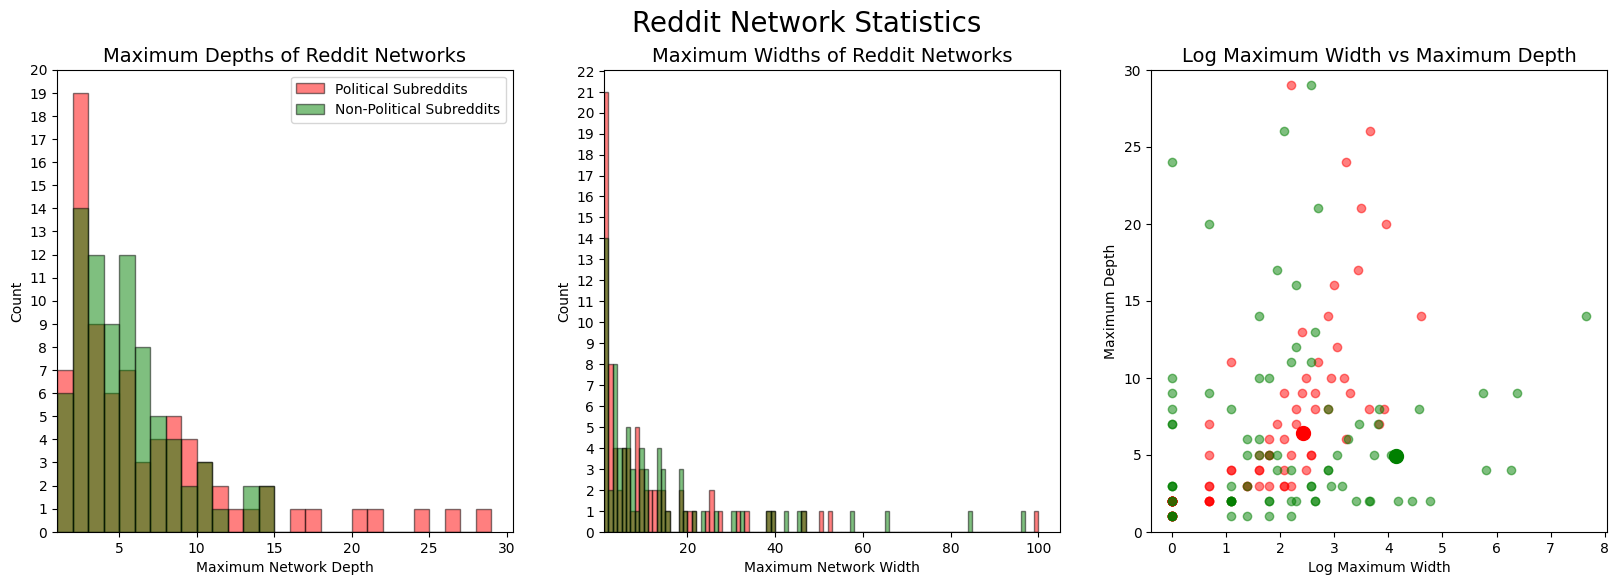

In [54]:
import pandas as pd
import numpy as np

# at this point I had no idea how to make this cleaner code so here is the kinda horrible 1st draft code, 
# it takes all the lists of maxes and makes a megalist, one each for political and non-political
political = np.array([subreddit_class_dict['neoliberal'].count_nodes + subreddit_class_dict['australianpolitics'].count_nodes + subreddit_class_dict['canadapolitics'].count_nodes + subreddit_class_dict['political_revolution'].count_nodes, 
             subreddit_class_dict['neoliberal'].depth + subreddit_class_dict['australianpolitics'].depth + subreddit_class_dict['canadapolitics'].depth + subreddit_class_dict['political_revolution'].depth,
             subreddit_class_dict['neoliberal'].width + subreddit_class_dict['australianpolitics'].width + subreddit_class_dict['canadapolitics'].width + subreddit_class_dict['political_revolution'].width])

non_political = np.array([subreddit_class_dict['peloton'].count_nodes + subreddit_class_dict['rats'].count_nodes + subreddit_class_dict['raleigh'].count_nodes + subreddit_class_dict['cheese'].count_nodes, 
             subreddit_class_dict['peloton'].depth + subreddit_class_dict['rats'].depth + subreddit_class_dict['raleigh'].depth + subreddit_class_dict['cheese'].depth,
             subreddit_class_dict['peloton'].width + subreddit_class_dict['rats'].width + subreddit_class_dict['raleigh'].width + subreddit_class_dict['cheese'].width])





fig, (ax0, ax1, ax2) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,6))
ax0.hist(political[1], bins=range(min(political[1]), max(political[1]) + 1), histtype = 'bar', edgecolor = 'black', color = 'red', rwidth = 1.5, alpha = 0.5, stacked = True, label = 'Political Subreddits')
ax0.hist(non_political[1], bins = range(min(political[1]), max(political[1]) + 1), histtype = 'bar', edgecolor = 'black', color = 'green', rwidth = 1.5, alpha = 0.5, stacked = True, label = 'Non-Political Subreddits')
ax0.legend(prop={'size': 10})
ax0.set_yticks(range(0, 21))
ax0.set_xbound(lower = 1)
ax0.set_title("Maximum Depths of Reddit Networks", fontsize=14)
ax0.set_xlabel("Maximum Network Depth")
ax0.set_ylabel("Count")

ax1.hist(political[2], bins=range(min(political[2]), max(political[2]) + 1), histtype = 'bar', edgecolor = 'black', color = 'red', rwidth = 1.5, alpha = 0.5, stacked = True, label = 'Political Subreddits')
ax1.hist(non_political[2], bins = range(min(political[2]), max(political[2]) + 1), histtype = 'bar', edgecolor = 'black', color = 'green', rwidth = 1.5, alpha = 0.5, stacked = True, label = 'Non-Political Subreddits')
ax1.set_title("Maximum Widths of Reddit Networks", fontsize=14)
ax1.set_yticks(range(0, 23))
ax1.set_xbound(lower = 1)
ax1.set_xlabel("Maximum Network Width")
ax1.set_ylabel("Count")

ax2.scatter(np.log(political[2]),political[1],color='red', alpha=0.5)
ax2.scatter(np.log(non_political[2]),political[1],color='green', alpha=0.5)
ax2.plot([np.log((sum(political[2]))/80)], [sum(political[1])/80], marker='.', ls='none', ms=20, color='red')
ax2.plot([np.log((sum(non_political[2]))/80)], [sum(non_political[1])/80], marker='.', ls='none', ms=20, color='green')
ax2.xlim(0, 8)
ax2.ylim(0, 30)
ax2.set_title('Log Maximum Width vs Maximum Depth', fontsize=14)
ax2.set_xlabel('Log Maximum Width')
ax2.set_ylabel("Maximum Depth")

plt.suptitle("Reddit Network Statistics", fontsize= 20)
plt.show()

The first histogram shows the maximum depths of the networks in the subreddits, split into political and non-political. The political subreddits have a much wider range of values than the non-political ones, seen by the long right tail of the distribution. It's interesting that they have a large spike at 2, meaning there are several posts where the depth extends only so far as first-level comments, however there is a steep dropoff after this until a secondary spike at 8 and around it, with several posts having a depth of 7-10 in the political subreddits. Conversely, the majority of posts fall under a maximum depth of 2-6 in the non-political posts i.e. 1-5 comment depth per post. This indiccates that the depth of discussion is greater in the political posts than the non-political ones, as one may expect. 

The maximum widths are almost inverse of the depths, with the political subreddits having a lower average maximum depth than the non-political ones. The political subreddits are mostly under 15 for their widths, showing people don't create as many new comments but rather react to other people's comments. Non-political ones are more likely perhaps to react to the post and not continue comment trains, as the subreddits often have different purposes. For example, in r/cheese the majority of the posts are pictures of cheese and people replying that they have eaten said cheese or it's (not) tasty. This does not lend itself well to deep discussion. Similarly r/rats is full of people posting adorable pictures of their rats or posts about the death of their beloved pets. Again, this creates shallow conversations, with people mostly replying in first-level comments acknowledging the adorablness or offering their condolences for the loss of a ratty. r/peloton is an interesting case, as there are discussion threads on the road cycling races for that day, therefore in these posts one would expect the depth to be larger than for the former two subreddits. r/raleigh is a mix of all sub-categories, with a couple politically-inclined posts, some with just pictures of Raleigh and the surrounding area or memes about the constant traffic and roadworks on I-40 (justifiably) where the network would not be deep, and a few posts in between when people ask for advice about what to see in Raleigh. Perhaps these subcatergories could be found from plotting individual subreddits, collecting more posts for each and finding forums for 'shallow' conversations, mainly ones with pictures and people reacting to that, and ones with deeper discussions such as politics or daily discussion threads about the Tour de France.

Lastly, the scatter plot of log maximum width and the maximum depth shows that political subreddits fall into a band and a pattern while the non-political do not. The political subreddits linearly increase their depth as the log width increases, whereas the non-political ones are almost absent from this band, instead mostly tending to increase their width and not their depth too much, while a few have high depth but not width. This is seen in the mean values, with the red one signifying the political subreddits comfortably in that band of red, while the green on is showing a much larger width and less depth. This goes with the theory that policial debates and networks are more about the depth than the non-political subreddits. People tend to reply more to already existing comments and are more likely to continue a debate rather than creating their own comments and not talking in great detail about them.

One limitation is to have subreddits of only size 100,000-250,000. Perhaps larger ones exhibit different behaviors. Another is that while 4 subreddits are clearly for politics and the others are not specifically designed for that, r/raleigh does occasionally have posts related to politics or have politically-inclinded topis of discussion in non-political posts. Politics in general can bleed into other subreddits. Reddit is also mostly an American and Canadian social media, so perhaps some cultures are different in the way that politics shapes their networks and discussions, especially as the recent years has seen the US have very divided opinions on politics resulting in turmoil and chaos. It would be interesting to note whether the time of day and day of the week has an impact on the data collected. For example, I waited for the evening/night to collect my data in the hope that there would be more North Americans awake who are posting and commenting. I also happened to choose a day when the r/peloton subreddit would be quite active for their daily Tour de France post, as one of the most prominent riders crashed out of the race that day, so perhaps that had a slight bearing on the number of nodes and the calculations for that pariticular subreddit. A minimum time of post existence may be useful. Some of the posts may have been quite new and not have been fully populated yet, therefore skewing the results downward. Perhaps not a limitation, but it would be interesting to see if that results would be vastly different without posts with no comments. This would show something a little different, looking more at comments rather than posts, but seeing as there were a few posts that had no comments, this would be an interesting extension. 